# Example for Module 1

This is a quick example with the objective of introducing you to exploring and visualizing data using Python. The data set contains information about a graduate student software survey collected in December 2016. We will analyze student software preferences.

First things first...Load the libraries.  I recommmend you do the coding in chunks.

## Import Libraries

In [1]:
import pandas as pd  # data  
import numpy as np  #mathematics
import matplotlib.pyplot as plt  #plots
import seaborn as sns  #graphics package
from sklearn import datasets  #you might as well get used to sklearn
import os #manage files
#os.chdir('C:\\Users\\natha\\Desktop')

## Define a Function for the Heat Map

You will definitely want to learn how to build functions. The "def" function defines a function for us. You may want to take a look at the seaborne package options, but I have dissected it for you below.

In [2]:
# correlation heat map setup for seaborn
# Note the colon!  We are building the corr_chart function and passing df_corr to it.
def corr_chart(df_corr):
    
    #This is simple.  We are using the .corr() to build a correlation matrix
    corr=df_corr.corr() 
    
    #Ok.  This is trickier.  Using numpy's zeros_like function, we return an array of zeros of the same shape and type.
    #The dtype option forces the data to be boolean.
    #the zeros are stored in "top.""
    top = np.zeros_like(corr, dtype=np.bool)
    
    #This numpy function returns the indices from the upper triangle of an array and sets them to TRUE for use as a mask. 
    top[np.triu_indices_from(top)] = True
    
    #Establish a Matlib (plt) figure container
    fig=plt.figure()
    
    #Build figure parameters
    fig, ax = plt.subplots(figsize=(12,12))
    
    #Define the seaborn heatmap function.  We will plot the passed correlation.  
    #We will use the mask "top" we just built.
    #We will use a color map of coolwarm.     
    sns.heatmap(corr, mask=top, cmap='coolwarm',  
        center = 0, square=True,  #Center location and shape = square.
        linewidths=.5, cbar_kws={'shrink':.5}, #linewidth and colorbar parameters set.
        annot = True, annot_kws={'size': 9}, fmt = '.3f') #Annotation and annotation parameters, 3 decimals.       
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis) 
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   #title
    
####No need to save the plot.  I am using a Notebook###
    #plt.savefig('plot-corr-map.pdf',  #save figure options
        #bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        #orientation='portrait', papertype=None, format=None, 
        #transparent=True, pad_inches=0.25, frameon=None)       
np.set_printoptions(precision=3) #set the print options

## Data and Descriptives (Simple)

So we imported the libraries and built the function.  What now?  We have to read the data. You might have to change your path here. Also, we will run some quick descriptive statistics.

In [3]:
# read the data using pandas read_csv function

survey = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as a unique label for the rows and drop from the data.frame
survey.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nQuick Exploration of Data ---------------')

#len in Python is equivalent to length in R.
print('\nNumber of Respondents =', len(survey)) 

# show the column/variable names of the DataFrame
print(survey.columns)

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(survey)) 

# Rename the variables using .rename 
survey_df = survey.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'Java',
    'Personal_JavaScriptHTMLCSS': 'JS',
    'Personal_Python': 'Python',
    'Personal_R': 'R',
    'Personal_SAS': 'SAS',
    'Professional_JavaScalaSpark': 'ProfJava',
    'Professional_JavaScriptHTMLCSS': 'ProfJS',
    'Professional_Python': 'ProfPython',
    'Professional_R': 'ProfR',
    'Professional_SAS': 'ProfSAS',
    'Industry_JavaScalaSpark': 'IndJava',
    'Industry_JavaScriptHTMLCSS': 'IndJS',
    'Industry_Python': 'IndPython',
    'Industry_R': 'IndR',
    'Industry_SAS': 'IndSAS'})
    
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, ('Java', 'JS', 'Python', 'R', 'SAS')]
print(pd.DataFrame.head(software_df)) 
print(software_df.columns)

#describe the data set
software_df.describe(include='all')


Quick Exploration of Data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')
              Personal_JavaScalaSpark  Personal_JavaS

,Java,JS,Python,R,SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681
std,11.383477,6.757764,15.570982,14.576003,13.626400
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000


## Discussion...Then Plotting

Looking at the results, we can see that the measures of center favor R and then Python, with SAS, Java, and JavaScript in distant positions.  Not surprising, is it?  

So we ran some descriptive statistics.  Now what?  Let's do a few graphs.

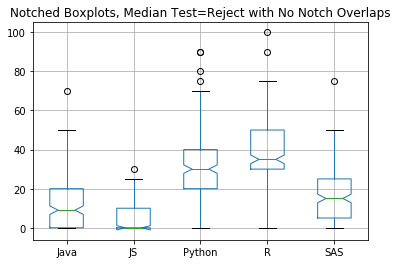

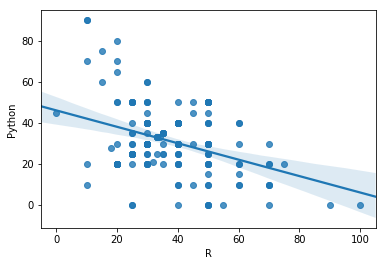

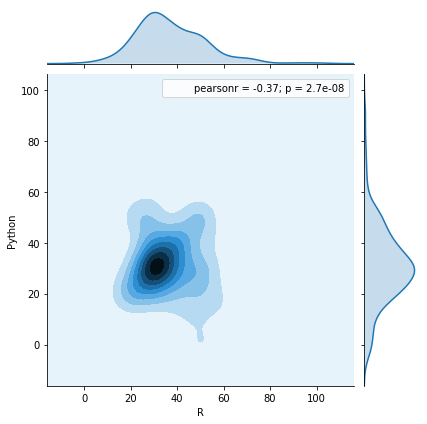

In [4]:
#boxplots
myplot=software_df.plot.box(grid=1, notch=1)
myplot.set_title("Notched Boxplots, Median Test=Reject with No Notch Overlaps")

# single scatter plot example
fig,ax=plt.subplots()
ax = sns.regplot(x="R", y="Python", data=software_df)

# joint plot
sns.jointplot(x="R", y="Python", data=software_df, kind="kde");

## Discussion and More Plotting

Looking at the notched boxplots, we can see that there are statistically significant differences in the distributed points between R and all other software, Python and all other software, and between JavaScript and all other software.  Java and SAS are not statistically different.  (Google notched boxplots for a discussion of how we can tell this.)  NOTE:  be careful about interpreting JavaScript.  The bottom notch is collapsed indicating insufficiency for testing.  R is favored.  Then Python.  Then SAS and Java. 

In the second plot, we have Python vs. R.  As interest in R increases, interest in Python decreases.  The relationship is not that tight.  We could do this for all of our software. 

The last graph provides R vs. Python and associated densities. The bivariate density is far from bivariate normal. 

So we have some basic plotting down. (I would obviously use seaborn anywhere possible.)  Next let's do some more. 

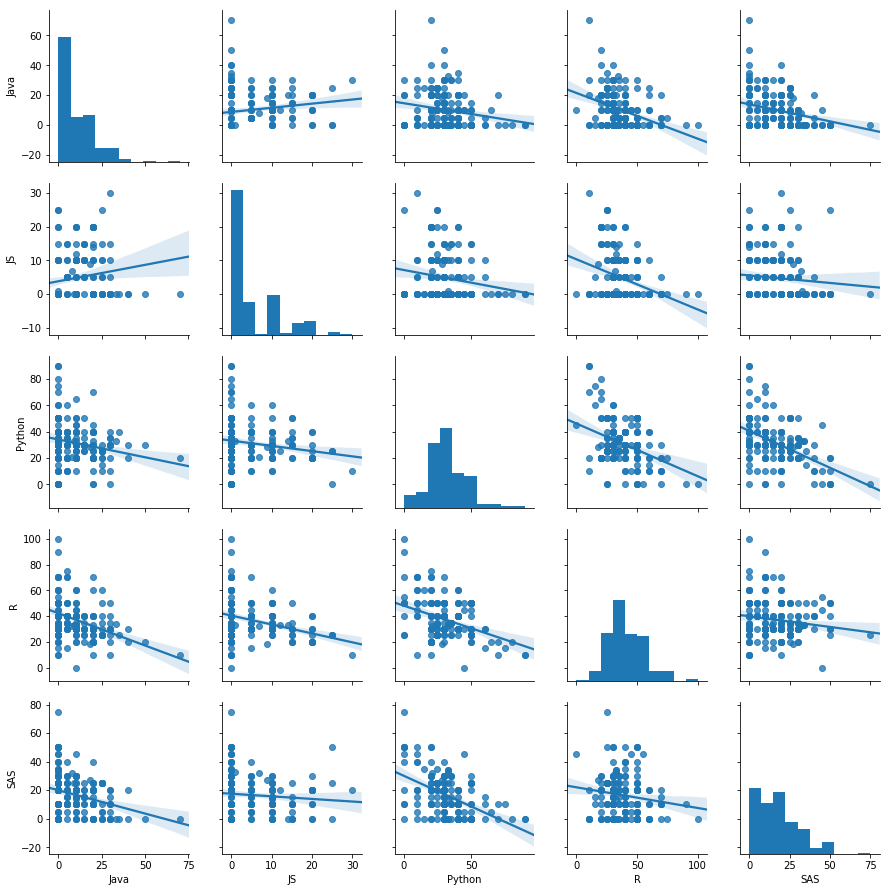

<Figure size 432x288 with 0 Axes>

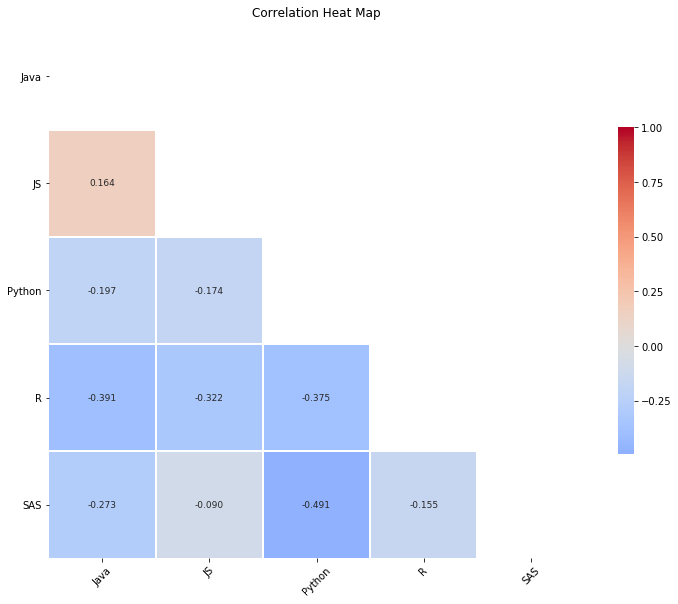

In [8]:
#Scatterplot matrix
sns.pairplot(software_df, kind="reg")

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

## Discussion / Plotting Heatmap without a Function

The scatterplot matrix shows (again) that most relationships among the software are negatively correlated. There really isn't much linearity visible.  We should add some more useful components, but I omit those here.   

The correlation heat matrix documents that the only positive correlation is between Java & JavaScript.  Interesting to note...

Obviously, we don't need to define a function (def) to plot a correlation heat map.  But it's useful.  If we wanted just the basics, we could do the following without a mask or anything fancy. 

            Java        JS    Python         R       SAS
Java    1.000000  0.164302 -0.197282 -0.391172 -0.273014
JS      0.164302  1.000000 -0.173517 -0.321997 -0.090473
Python -0.197282 -0.173517  1.000000 -0.374659 -0.491077
R      -0.391172 -0.321997 -0.374659  1.000000 -0.155090
SAS    -0.273014 -0.090473 -0.491077 -0.155090  1.000000


Text(0.5,1,'Correlation Heat Map')

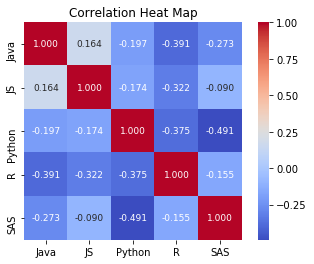

In [6]:
mycorr=software_df.corr()# get the correlation matrix
print(mycorr) #print to verify
sns.heatmap(mycorr, cmap="coolwarm", square=1, annot = True, annot_kws={'size': 9}, fmt = '.3f')
plt.title('Correlation Heat Map')  

##  Preprocessing 

Of course, we often need to scale our data.  This becomes particularly important for neural networks and deep learning approaches as you will see.   Below, we will do two types of scaling.

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


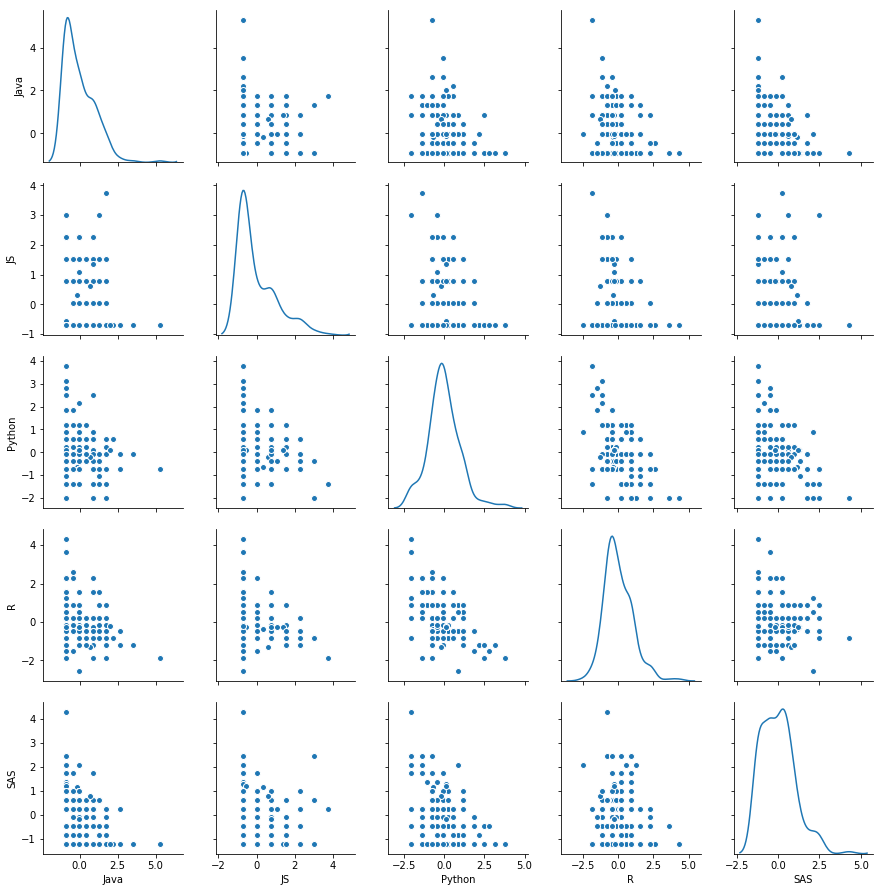

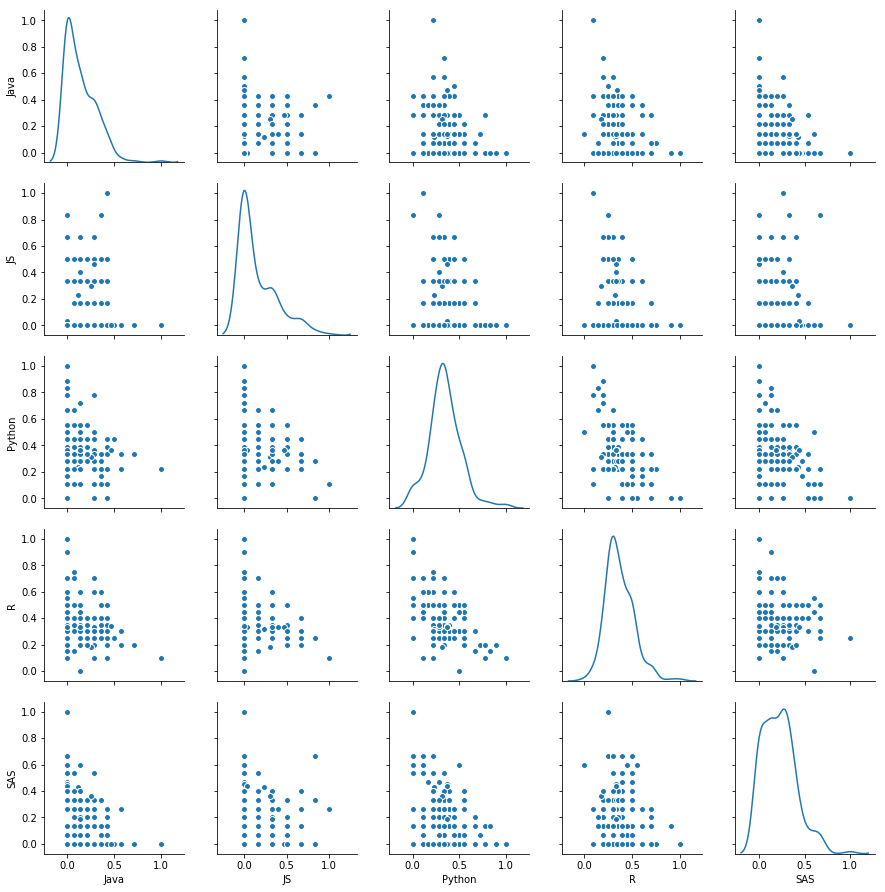

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#Typical location / scale transformation
X_train=np.array(software_df)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
newx=scaler.transform(X_train) 
dataset = pd.DataFrame({'Java':newx[:,0],'JS':newx[:,1], 'Python':newx[:,2], 'R':newx[:,3],'SAS':newx[:,4]})
sns.pairplot(dataset, diag_kind='kde')

#Typical min/max transformation
min_max_scaler = preprocessing.MinMaxScaler()
newx2 = min_max_scaler.fit_transform(X_train)
dataset2 = pd.DataFrame({'Java':newx2[:,0],'JS':newx2[:,1], 'Python':newx2[:,2], 'R':newx2[:,3],'SAS':newx2[:,4]})
sns.pairplot(dataset2, diag_kind='kde') 

## Departing Thoughts

This exercise demonstrated the initial workings of Python for you, and it should have resulted in recommendations.  Some of those recommendations would include the focus on R and Python.